# TITLE: <span style = "color: brown;">A CEO AND THE COMPANY EMPLOYEES PAY DIFFERENCE</span>

## <span style = "color: blue">Objective:</span>
   1) **What is the average pay of a CEO?**
   2) **What is the average pay of an Employee?**
   3) **What is the average revenue of a Company?**
   4) **Difference between CEO AND EMPLOYEE pay amount.**
   5) **Top 10 Highest paid CEO's**
   6) **Last 5 paid CEO's**
   7) **Top 10 company by CEO pay**
   8) **Revenue of a Company vs CEO Pay**
   9) **Will company growth impact on the CEO and the Employee salary. If yes then how much?**
   10) **Factors affecting CEO Pay?**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv("CEO_largestrevenue_highestpaid_2020-21.csv")

In [3]:
## Let's check the data how it looks like
df.head()

,ceo,company,stockTicker,ceoPay,changePay,revenue,revenueChange,employeePay,payRatio
0,C. Douglas McMillon,Walmart,WMT,21198778,1.0,559151,1.0,20942.0,1012.0
1,Tim Cook,Apple,AAPL,98734394,569.0,365817,NaN,68234.0,1447.0
2,Warren E. Buffett,Berkshire Hathaway,BRK.A,373204,-2.0,276094,NaN,62201.0,6.0
3,David S. Wichmann,UnitedHealth,UNH,17872713,-5.0,257141,-5.0,55696.0,321.0
4,Steven H. Collis,AmerisourceBergen,ABC,14873815,4.0,213989,NaN,64951.0,229.0


### So as we can see in the data we have columns like ceo name, company, company revenue, ceo revenue and employeePay and many more...

In [4]:
## Revenue is in Million

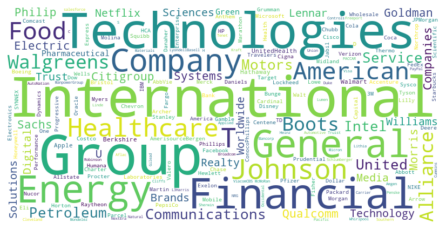

In [5]:
from IPython.display import Image

# Specify the path to your image file
image_path = 'COMPANY_SERVICES.png'

# Display the image
Image(filename=image_path)


### This kind of services provided by the company mention in the datasets

#### Let's start by checking the size of the dataset 

In [6]:
df.shape

(255, 9)

In [7]:
## we have 255 rows and 9 colummns

In [8]:
# Checking is the null value present in the data or not.
df.isnull().sum()

ceo               0
company           0
stockTicker       0
ceoPay            0
changePay        44
revenue           0
revenueChange    55
employeePay      12
payRatio         12
dtype: int64

In [9]:
## There are few column which include few null values

##### Let's check the percentage of the null values

In [10]:
per = df.isnull().sum()/len(df)*100

In [11]:
per

ceo               0.000000
company           0.000000
stockTicker       0.000000
ceoPay            0.000000
changePay        17.254902
revenue           0.000000
revenueChange    21.568627
employeePay       4.705882
payRatio          4.705882
dtype: float64

In [12]:
## According to data percentage the data specifically we need form the dataset for analysis has no null value and the 
## remain that we don't need. Even if we need them will do the imputation before using it.

## 1) What is the average pay of a CEO?

In [13]:
average_pay_ceo = df['ceoPay'].mean()

In [14]:
average_pay_ceo

32496030.576470587

### So, the average pay of a CEO is around 32496030.58 (US Dollars $ )

### In  Indian rupees it is around 

In [15]:
Indian_Rs = 32496030.58 * 83.12

In [16]:
Indian_Rs

2701070061.8096

In [17]:
## In Indian Rupees the average pay of an CEO is 2701070061.81

In [18]:
## Let visualise it.

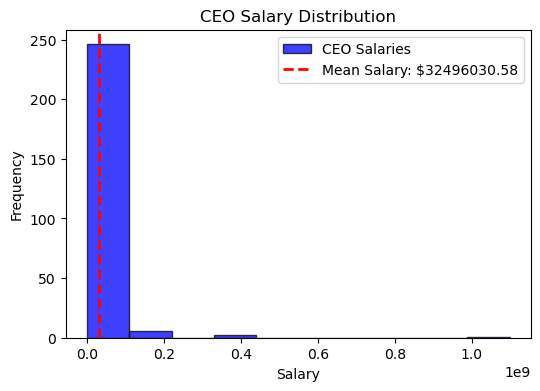

In [19]:
# Create a figure with a specific size
plt.figure(figsize=(6, 4))

# Create a histogram of CEO salaries without specifying the number of bins
plt.hist(df['ceoPay'], alpha=0.75, color='blue', edgecolor='black', label='CEO Salaries')

# Calculate the mean salary
mean_salary = df['ceoPay'].mean()

# Plot a vertical dashed line at the mean salary and label it
plt.axvline(mean_salary, color='red', linestyle='dashed', linewidth=2, label=f'Mean Salary: ${mean_salary:.2f}')

# Set labels and title
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('CEO Salary Distribution')

# Add a legend
plt.legend()

# Show the plot
plt.show()


## 2) What is the average pay of an Employee?

In [20]:
## In this code we are calaculating the average salary on employee of company but not including to those rows how 
## are having the enmployee pay as null or 0 because it will decrease the average pay.

# Filter out rows with null or 0 salaries
filtered_df = df[(df['employeePay'].notnull()) & (df['employeePay'] != 0)]

# Count the number of remaining rows
count_excluded_rows = len(df) - len(filtered_df)

# Print the count of excluded rows
print(f"Number of excluded rows: {count_excluded_rows}")

# You can also print or analyze the filtered DataFrame if needed
print("Filtered DataFrame:")
filtered_df


Number of excluded rows: 12
Filtered DataFrame:


,ceo,company,stockTicker,ceoPay,changePay,revenue,revenueChange,employeePay,payRatio
0,C. Douglas McMillon,Walmart,WMT,21198778,1.0,559151,1.0,20942.0,1012.0
1,Tim Cook,Apple,AAPL,98734394,569.0,365817,NaN,68234.0,1447.0
2,Warren E. Buffett,Berkshire Hathaway,BRK.A,373204,-2.0,276094,NaN,62201.0,6.0
3,David S. Wichmann,UnitedHealth,UNH,17872713,-5.0,257141,-5.0,55696.0,321.0
4,Steven H. Collis,AmerisourceBergen,ABC,14873815,4.0,213989,NaN,64951.0,229.0
...,...,...,...,...,...,...,...,...,...
249,Vladimir Shmunis,RingCentral,RNG,19059431,94.0,1184,94.0,128336.0,149.0
250,Joe Kiani,Masimo,MASI,15493723,3.0,1144,3.0,102348.0,151.0
252,Marc Holliday,SL Green Realty,SLG,15194726,-28.0,1053,-28.0,69626.0,218.0
253,Nathaniel A. Davis,Stride,LRN,15932680,63.0,1041,63.0,51502.0,309.0


In [21]:
average_pay_employee = df['employeePay'].mean()

In [22]:
average_pay_employee

87869.98765432098

### The average salary of an Employee is around 87869.99 (US Dollar $)

### In  Indian rupees it is around 

In [23]:
Indian_Rs = 87869.99 * 83.12

In [24]:
Indian_Rs

7303753.5688000005

In [25]:
## In Indian Rupees the average pay of an CEO is 7303753.57 Rs.

In [26]:
## Let visualise it.

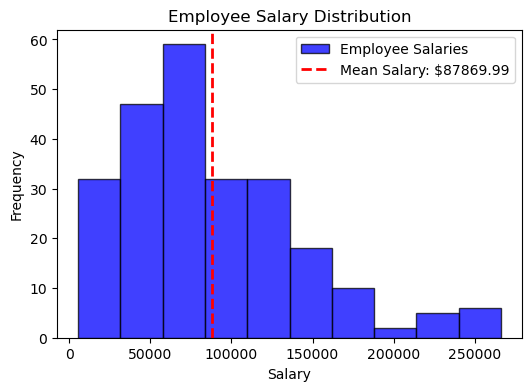

In [27]:
# Create a figure with a specific size
plt.figure(figsize=(6, 4))

# Create a histogram of CEO salaries without specifying the number of bins
plt.hist(df['employeePay'], alpha=0.75, color='blue', edgecolor='black', label='Employee Salaries')

# Calculate the mean salary
mean_salary = df['employeePay'].mean()

# Plot a vertical dashed line at the mean salary and label it
plt.axvline(mean_salary, color='red', linestyle='dashed', linewidth=2, label=f'Mean Salary: ${mean_salary:.2f}')

# Set labels and title
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Employee Salary Distribution')

# Add a legend
plt.legend()

# Show the plot
plt.show()


In [28]:
# As we can see the average pay of an Employee is around 87869.99 (US Dollars $ )

## 3) What is the average revenue of a Company?

In [29]:
average_revenue = df['revenue'].mean()

In [30]:
average_revenue

38496.25490196078

### The average revenue of a Company is around 38496.25 Million (US Dollar $)

### In  Indian rupees it is around 

In [31]:
Indian_Rs = 38496.25 * 83.12

In [32]:
Indian_Rs

3199808.3000000003

In [33]:
### In Indian rupees the average revenue of the company is 3199808.30

In [34]:
### Let's visualise it.

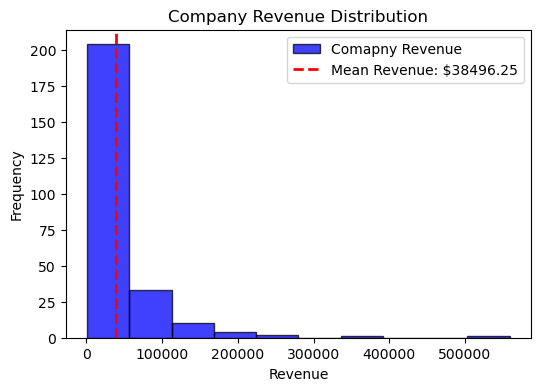

In [35]:
# Create a figure with a specific size
plt.figure(figsize=(6, 4))

# Create a histogram of CEO salaries without specifying the number of bins
plt.hist(df['revenue'], alpha=0.75, color='blue', edgecolor='black', label='Comapny Revenue')

# Calculate the mean salary
mean_salary = df['revenue'].mean()

# Plot a vertical dashed line at the mean salary and label it
plt.axvline(mean_salary, color='red', linestyle='dashed', linewidth=2, label=f'Mean Revenue: ${mean_salary:.2f}')

# Set labels and title
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Company Revenue Distribution')

# Add a legend
plt.legend()

# Show the plot
plt.show()


## 4) Difference between CEO AND EMPLOYEE pay amount.

In [36]:
### The difference between the CEO and the Employee salary

In [37]:
pay_diff = average_pay_ceo - average_pay_employee

In [38]:
pay_diff

32408160.588816267

### The averange difference between ceo and the employee salary is around 32408160.59
### The CEO salary is 36,981.94% higher than the EMPLOYEE salary.

### In Indian rupee it is around

In [39]:
Indian_Rs = 32408160.59 * 83.12

In [40]:
Indian_Rs

2693766308.2408

In [41]:
### In Indian rupees the difference between the CEO and Employee salary is 3199808.30

In [42]:
### Let's visualise it.

In [43]:
average_pay_ceo = 32496030.58
average_pay_employee = 87869.99

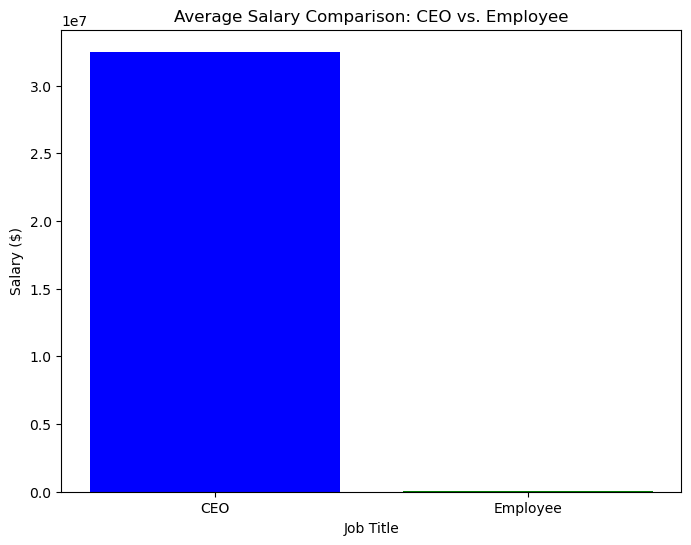

In [44]:
# Create a bar chart
categories = ['CEO', 'Employee']
salaries = [average_pay_ceo, average_pay_employee]

plt.figure(figsize=(8, 6))
plt.bar(categories, salaries, color=['blue', 'green'])
plt.xlabel('Job Title')
plt.ylabel('Salary ($)')
plt.title('Average Salary Comparison: CEO vs. Employee')
plt.show()

In [45]:
### As we can see in the graph the EMPLOYEE salary is more more less than the CEO salary.
### The CEO salary is 36,981.94% higher than the EMPLOYEE salary.

### Percentage Calculation

average_pay_ceo = 32496030.58

average_pay_employee = 87869.99

pay_diff = 32496030.58 - 87869.99

pay_diff = 32408160.59

percentage_diff = 32408160.59 / 87869.99 * 100

percentage_diff = 36981.94

## 5) Top 10 Highest paid CEO's

In [46]:
### Checking the top 10 highest paid CEO name

In [47]:
top_10_ceo = df.sort_values(by='ceoPay', ascending=False).head(10)

In [48]:
top_10_ceo

,ceo,company,stockTicker,ceoPay,changePay,revenue,revenueChange,employeePay,payRatio
251,Alexander Karp,Palantir Technologies,PLTR,1098513297,8979.0,1093,8979.0,NaN,NaN
219,Tony Xu,DoorDash,DASH,413669920,137670.0,2886,137670.0,NaN,NaN
223,Eric Wu,Opendoor Technologies,OPEN,370240992,134533.0,2583,134533.0,NaN,NaN
254,Chad Richison,Paycom Software,PAYC,211131206,899.0,841,899.0,71259.0,2963.0
216,Joseph Levin,IAC/InterActiveCorp,IAC,189503132,1122.0,3048,1122.0,NaN,NaN
35,Patrick P. Gelsinger,Intel,INTC,177905400,NaN,79024,NaN,103977.0,1711.0
182,Robert Kotick,Activision Blizzard,ATVI,154613318,413.0,8086,413.0,99100.0,1560.0
180,Leonard S. Schleifer,Regeneron Pharmaceuticals,REGN,135350121,531.0,8497,531.0,145019.0,933.0
212,Brian Chesky,Airbnb,ABNB,120099075,28428.0,3378,28428.0,NaN,NaN
1,Tim Cook,Apple,AAPL,98734394,569.0,365817,NaN,68234.0,1447.0


### Here's the list of Top 10 Highest paid CEO's name.
### And ALEXANDAR KARP who is CEO of PALANTIR TECHNOLOGIES is earning more than 1000 Million Dollar anually which is the highest.

### In Indian rupees Alexandar Karp is earning

In [49]:
Indian_Rs = 1098513297 * 83.12

In [50]:
Indian_Rs

91308425246.64

### According to Indian rupees Alexandar Karp is earning more than 9000 thousand crore rupees anually

In [51]:
### Let's visualize it.

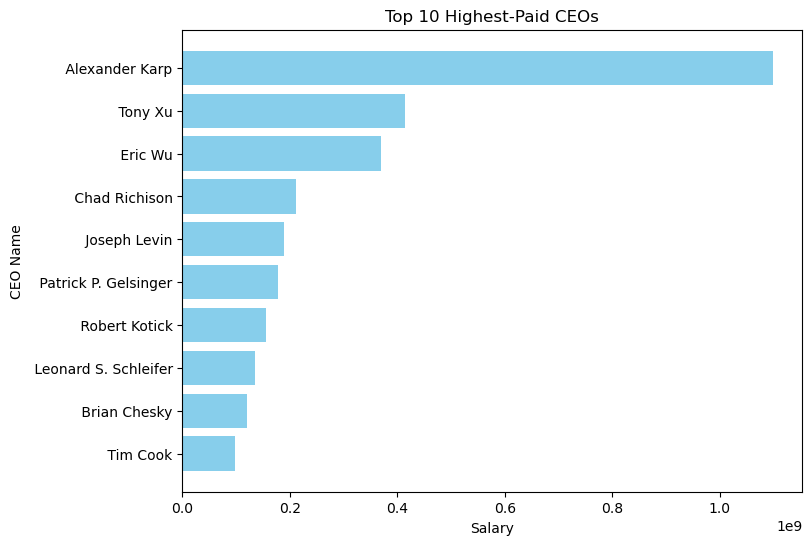

In [52]:
# Sort the DataFrame by 'Salary' column in descending order and select the top 10 rows
top_10_ceos = df.sort_values(by='ceoPay', ascending=False).head(10)

# Extract CEO names and their corresponding salaries
ceo_names = top_10_ceos['ceo']
salaries = top_10_ceos['ceoPay']

# Create a bar chart to visualize the top 10 highest-paid CEOs
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.barh(ceo_names, salaries, color='skyblue')
plt.xlabel('Salary')
plt.ylabel('CEO Name')
plt.title('Top 10 Highest-Paid CEOs')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest salary at the top
plt.show()

In [53]:
### Here is the list of the highest paid CEO's name and every x-axis number indicate 100 Million dollar.

### We can say that Alexandar is an outlier. Because he is earning way higher than other CEO's.

## 6) Last 5 paid CEO's

In [54]:
### Checking the last 5 paid CEO name

In [55]:
least_5_paid_ceos = df.sort_values(by='ceoPay', ascending=False).tail(5)

In [56]:
least_5_paid_ceos

,ceo,company,stockTicker,ceoPay,changePay,revenue,revenueChange,employeePay,payRatio
106,Steven L. Spinner,United Natural Foods,UNFI,8403365,-5.0,26950,NaN,54215.0,155.0
89,George L. Holm,Performance Food Group,PFGC,8228550,33.0,30399,NaN,76902.0,107.0
111,Roger S. Penske,Penske Automotive Group,PAG,6981685,17.0,25555,NaN,52892.0,132.0
87,Richard T. Hume,TD SYNNEX,SNX,6394362,NaN,31614,NaN,35328.0,181.0
2,Warren E. Buffett,Berkshire Hathaway,BRK.A,373204,-2.0,276094,NaN,62201.0,6.0


### Here is the list of last 5 paid CEO's name
### WARREN E. BUFFETT is earning $ 373204 Dollar

In [57]:
### In Indian rupees it is around

In [58]:
Indian_Rs = 373204 * 83.12

In [59]:
Indian_Rs

31020716.48

### Warren E. Buffett is earning 31 Crore rupees anually as a CEO

In [60]:
### let's visualize it.

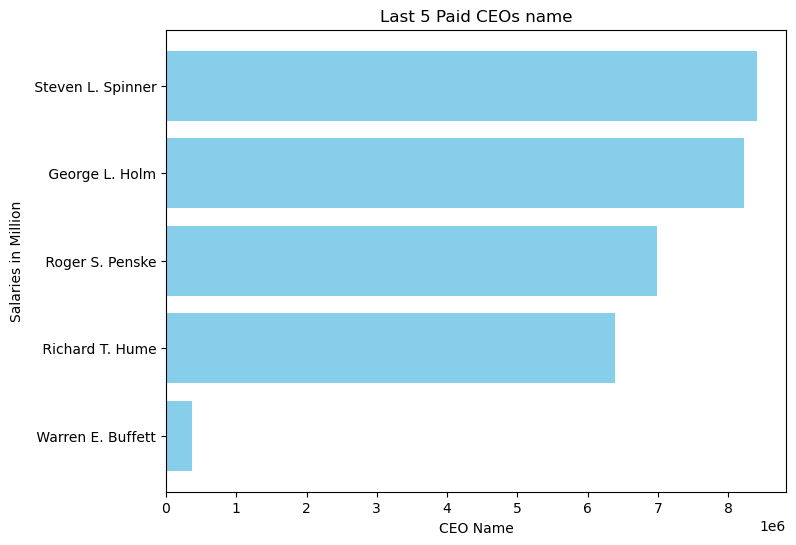

In [61]:
last_5_paid_ceos = df.sort_values(by='ceoPay', ascending=True).head(5)

ceo_name = last_5_paid_ceos['ceo']
salary = last_5_paid_ceos['ceoPay']

plt.figure(figsize = (8, 6))
plt.barh(ceo_name, salary, color='skyblue')
plt.xlabel('CEO Name')
plt.ylabel('Salaries in Million')
plt.title('Last 5 Paid CEOs name')
plt.show()

In [62]:
### Here is the list of the last paid CEO's name and every x-axis number indicate 1 Million dollar.

## 7) Top 10 company by CEO pay

In [63]:
### Checking top 10 Company name by CEO pay

In [64]:
company_name_by_ceo_pay = df.sort_values(by='ceoPay', ascending=False).head(10)

In [65]:
company_name_by_ceo_pay[['company', 'ceo', 'ceoPay']]

,company,ceo,ceoPay
251,Palantir Technologies,Alexander Karp,1098513297
219,DoorDash,Tony Xu,413669920
223,Opendoor Technologies,Eric Wu,370240992
254,Paycom Software,Chad Richison,211131206
216,IAC/InterActiveCorp,Joseph Levin,189503132
35,Intel,Patrick P. Gelsinger,177905400
182,Activision Blizzard,Robert Kotick,154613318
180,Regeneron Pharmaceuticals,Leonard S. Schleifer,135350121
212,Airbnb,Brian Chesky,120099075
1,Apple,Tim Cook,98734394


### Here is the list of the top 10 company name who's CEO is earning more

In [66]:
### Let's visualise it

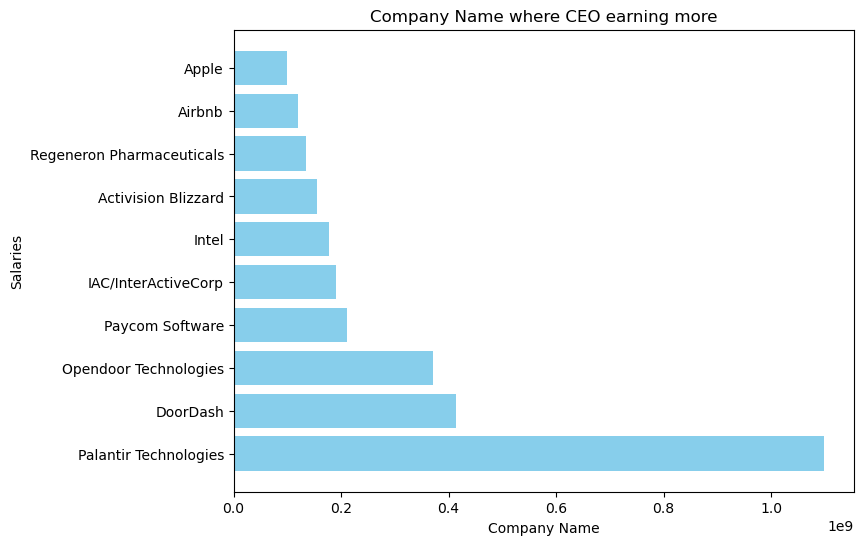

In [67]:
company_name_by_ceo_pay = df.sort_values(by='ceoPay', ascending=False).head(10)

company_name = company_name_by_ceo_pay['company']
salaries = company_name_by_ceo_pay['ceoPay']

plt.figure(figsize=(8,6))
plt.barh(company_name, salaries, color='skyblue')
plt.xlabel('Company Name')
plt.ylabel('Salaries')
plt.title('Company Name where CEO earning more')
plt.show()

In [68]:
### Here is the list of the Company name where CEO's are earning more and every x-axis number indicate 100 Million dollar.

## 8) Revenue of a Company vs CEO Pay

In [69]:
### Checking difference between Company Revenue and CEO pay

In [70]:
company_vs_ceo_pay = (df['revenue'] - df['ceoPay']).mean()

In [71]:
company_vs_ceo_pay

-32457534.321568627

**As we all know that the amount cannot come in negative. So First we have to convert the CEO pay into million because the Company Revenue is in million and the CEO salary is in counts (Dollars) thats why the difference we get is negative.**

In [72]:
df['ceoPay_Million'] = df['ceoPay'] / 1000000

In [73]:
df['ceoPay_Million']

0        21.198778
1        98.734394
2         0.373204
3        17.872713
4        14.873815
          ...     
250      15.493723
251    1098.513297
252      15.194726
253      15.932680
254     211.131206
Name: ceoPay_Million, Length: 255, dtype: float64

In [74]:
### Now let's again check the difference between Company Revenue and CEO Pay.

In [75]:
company_vs_ceo_pay = (df['revenue'] - df['ceoPay_Million']).median()

In [76]:
company_vs_ceo_pay

22821.544961

### So the average difference between the Company revenue and the CEO pay is $ 22821.54 Million Dollar

### $ 22821.54 Million Dollar = Rs. 22821540000 which is around 2 Housand 2 Hundred 82 Crore 15 Lakhs 40 Thousand Dollar

### In Indian Rs = 18,96,92,64,04,800 which is MORE THAN 1 Lakh 89 Thousand Crores

In [77]:
### Let's visualize it.

In [78]:
### Visualizing the Company Revenue and the CEO salary

<Figure size 300x300 with 0 Axes>

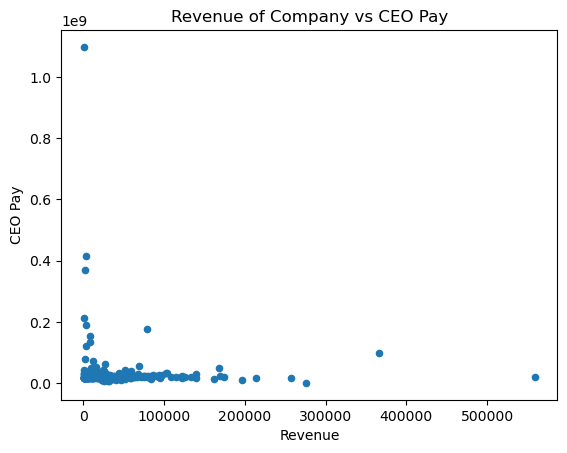

In [79]:
plt.figure(figsize=(3,3))
df.plot(x ='revenue', y='ceoPay', kind = 'scatter')
plt.xlabel('Revenue')
plt.ylabel('CEO Pay')
plt.title('Revenue of Company vs CEO Pay')
plt.show()

In [80]:
### Let's calculate the difference between Comapny Revenue and the CEO pay for each company present in the dataset.

In [81]:
df.head()

,ceo,company,stockTicker,ceoPay,changePay,revenue,revenueChange,employeePay,payRatio,ceoPay_Million
0,C. Douglas McMillon,Walmart,WMT,21198778,1.0,559151,1.0,20942.0,1012.0,21.198778
1,Tim Cook,Apple,AAPL,98734394,569.0,365817,NaN,68234.0,1447.0,98.734394
2,Warren E. Buffett,Berkshire Hathaway,BRK.A,373204,-2.0,276094,NaN,62201.0,6.0,0.373204
3,David S. Wichmann,UnitedHealth,UNH,17872713,-5.0,257141,-5.0,55696.0,321.0,17.872713
4,Steven H. Collis,AmerisourceBergen,ABC,14873815,4.0,213989,NaN,64951.0,229.0,14.873815


In [82]:
df.tail(5)

,ceo,company,stockTicker,ceoPay,changePay,revenue,revenueChange,employeePay,payRatio,ceoPay_Million
250,Joe Kiani,Masimo,MASI,15493723,3.0,1144,3.0,102348.0,151.0,15.493723
251,Alexander Karp,Palantir Technologies,PLTR,1098513297,8979.0,1093,8979.0,NaN,NaN,1098.513297
252,Marc Holliday,SL Green Realty,SLG,15194726,-28.0,1053,-28.0,69626.0,218.0,15.194726
253,Nathaniel A. Davis,Stride,LRN,15932680,63.0,1041,63.0,51502.0,309.0,15.932680
254,Chad Richison,Paycom Software,PAYC,211131206,899.0,841,899.0,71259.0,2963.0,211.131206


In [83]:
### Now we have merge the ceoPay_Billion column with df data frame

In [84]:
diff_revenue_salary = df['revenue'] - df['ceoPay']

In [85]:
diff_revenue_salary

0       -20639627
1       -98368577
2          -97110
3       -17615572
4       -14659826
          ...    
250     -15492579
251   -1098512204
252     -15193673
253     -15931639
254    -211130365
Length: 255, dtype: int64

**As we can see in the data that still we are getting few negative ceoPay values it means that not all CEO are earning in millions, but few of them are also earning in thousands or hundred as well.**

**So we can't calculate the acutual figure now, it will take more time to do so, because we have to individually check that which CEO is earning in Millions, thousands or Hundreds** 

In [86]:
### Let's check the Company Name who is earning the highest revenue

In [87]:
highest_revenue = df.sort_values(by='revenue', ascending=False).head(5)

In [88]:
highest_revenue

,ceo,company,stockTicker,ceoPay,changePay,revenue,revenueChange,employeePay,payRatio,ceoPay_Million
0,C. Douglas McMillon,Walmart,WMT,21198778,1.0,559151,1.0,20942.0,1012.0,21.198778
1,Tim Cook,Apple,AAPL,98734394,569.0,365817,NaN,68234.0,1447.0,98.734394
2,Warren E. Buffett,Berkshire Hathaway,BRK.A,373204,-2.0,276094,NaN,62201.0,6.0,0.373204
3,David S. Wichmann,UnitedHealth,UNH,17872713,-5.0,257141,-5.0,55696.0,321.0,17.872713
4,Steven H. Collis,AmerisourceBergen,ABC,14873815,4.0,213989,NaN,64951.0,229.0,14.873815


## 9) Will company growth impact on the CEO and the Employee salary. If yes then how much?

In [89]:
df

,ceo,company,stockTicker,ceoPay,changePay,revenue,revenueChange,employeePay,payRatio,ceoPay_Million
0,C. Douglas McMillon,Walmart,WMT,21198778,1.0,559151,1.0,20942.0,1012.0,21.198778
1,Tim Cook,Apple,AAPL,98734394,569.0,365817,NaN,68234.0,1447.0,98.734394
2,Warren E. Buffett,Berkshire Hathaway,BRK.A,373204,-2.0,276094,NaN,62201.0,6.0,0.373204
3,David S. Wichmann,UnitedHealth,UNH,17872713,-5.0,257141,-5.0,55696.0,321.0,17.872713
4,Steven H. Collis,AmerisourceBergen,ABC,14873815,4.0,213989,NaN,64951.0,229.0,14.873815
...,...,...,...,...,...,...,...,...,...,...
250,Joe Kiani,Masimo,MASI,15493723,3.0,1144,3.0,102348.0,151.0,15.493723
251,Alexander Karp,Palantir Technologies,PLTR,1098513297,8979.0,1093,8979.0,NaN,NaN,1098.513297
252,Marc Holliday,SL Green Realty,SLG,15194726,-28.0,1053,-28.0,69626.0,218.0,15.194726
253,Nathaniel A. Davis,Stride,LRN,15932680,63.0,1041,63.0,51502.0,309.0,15.932680


### We can see in the dataset as the revenueChange (change in company revenue) is changing the changePay (change in CEO Pay) is also changing with the same number.
### By watching this we can say that as the Company Revenue changes CEO Pay is also changing.

### And we can say that Alexandar Karp is an outlier because his pay out is way higher than others.

In [90]:
### Let's try visualize it.

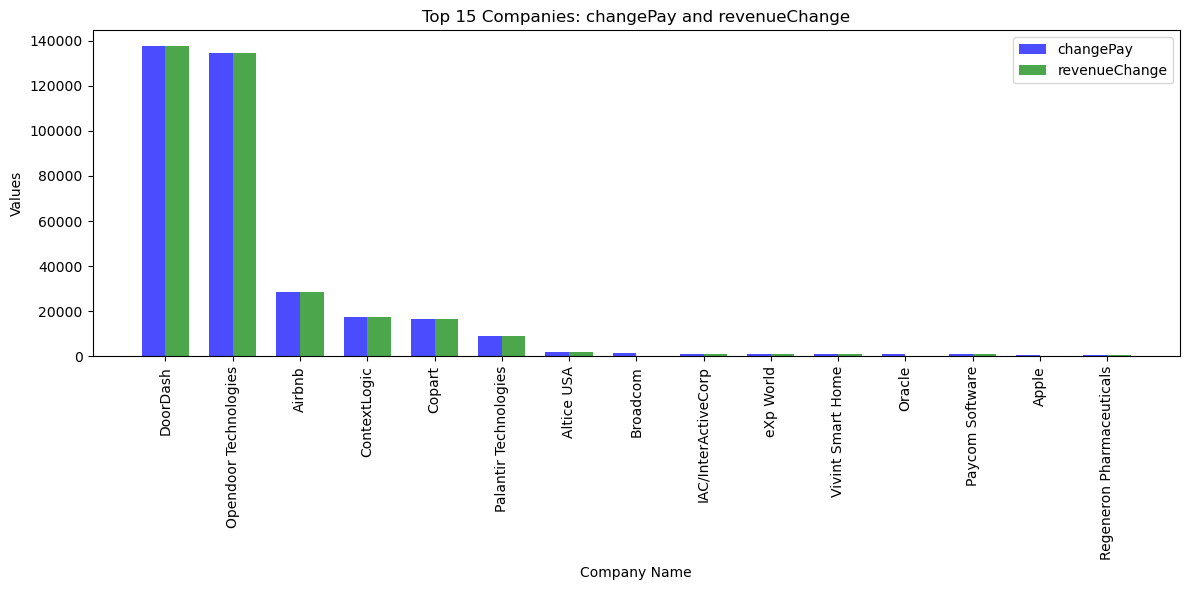

In [91]:
# Sort the DataFrame by 'changePay' column in descending order and select the top 15 rows
top_15_data = df.sort_values(by='changePay', ascending=False).head(15)

# Extract the 'Company Name', 'changePay', and 'revenueChange' columns
company_names = top_15_data['company']
change_pay_values = top_15_data['changePay']
revenue_change_values = top_15_data['revenueChange']

# Set the figure size
plt.figure(figsize=(12, 6))

# Create an array for the x-axis positions of bars
x = np.arange(len(company_names))

# Define the width of the bars
bar_width = 0.35

# Create grouped bar chart
plt.bar(x - bar_width/2, change_pay_values, label='changePay', alpha=0.7, color='b', width=bar_width)
plt.bar(x + bar_width/2, revenue_change_values, label='revenueChange', alpha=0.7, color='g', width=bar_width)

# Configure the plot
plt.xlabel('Company Name')
plt.ylabel('Values')
plt.title('Top 15 Companies: changePay and revenueChange')
plt.xticks(x, company_names, rotation=90)  # Set x-axis labels and rotate for readability
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


### By looking at the data we can clearly say that the CEO's salary is changing with an exact number as the COMPANY'S REVENUE changes. This could also mean that they have also bought shares of the company which rise and fall with changes in the COMPANY'S REVENUE.

### But for a normal EMPLOYEE, we can't say that with the increase in COMPANY'S REVENUE their SALARY is also increasing. And the reason can be that they have a fixed income or they do not have COMPANY shares.

## 10) Factors affecting CEO Pay?

In [92]:
### As we have discuss prior the factor afecting CEO Pay is the Company Revenue only.